In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


PROBLEM 1: CLASSIFICATION TASK WITH k-NN FROM SCRATCH



In [8]:
# Step 1: Load the Dataset
print("\n--- Step 1: Loading Dataset ---")
# Load the diabetes dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Display basic information
print("\nDataset Shape:", data.shape)
print("\nData Types:")
print(data.dtypes)
print("\nBasic Statistics:")
print(data.describe())

# Step 2: Exploratory Data Analysis (EDA)
print("\n--- Step 2: Exploratory Data Analysis ---")

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check class distribution
print("\nClass distribution (Outcome):")
print(data['Outcome'].value_counts())

# Step 3: Handle Missing Data
#
print("\n--- Step 3: Handling Missing Data ---")

# Calculate percentage of missing values
missing_info = data.isnull().sum() / len(data) * 100
print("\nPercentage of missing values:")
print(missing_info)

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10:  # More than 10% missing
        data[column].fillna(data[column].mean(), inplace=True)
        print(f"Filled {column} with mean value")
    elif missing_info[column] > 0:  # Less than 10% missing
        data.dropna(subset=[column], inplace=True)
        print(f"Dropped rows with missing values in {column}")

print("\nDataset shape after handling missing data:", data.shape)

# Step 4: Feature Engineering
print("\n--- Step 4: Feature Engineering ---")

# Separate features (X) and target (y)
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

print(f"\nFeature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")

# Train-test split function (70-30 split)
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Split dataset into train and test sets.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print(f"\nTraining set - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set - X_test: {X_test.shape}, y_test: {y_test.shape}")

# Step 5: Implement k-NN Algorithm

print("\n--- Step 5: Implementing k-NN Algorithm ---")

# Euclidean distance function
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions")

    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

# k-NN prediction for single point
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict class label for a single query point.
    """
    # Calculate distances to all training points
    distances = [euclidean_distance(query, x) for x in X_train]

    # Sort and get k nearest neighbors
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]

    # Majority voting
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# k-NN prediction for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict class labels for all test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Accuracy calculation function
def compute_accuracy(y_true, y_pred):
    """
    Calculate accuracy of predictions.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


# Step 6: Test k-NN with k=3
print("\n--- Step 6: Testing k-NN (k=3) ---")

# Make predictions
predictions = knn_predict(X_test, X_train, y_train, k=3)

# Calculate accuracy
accuracy = compute_accuracy(y_test, predictions)

print(f"\nAccuracy with k=3: {accuracy:.2f}%")
print(f"\nFirst 10 predictions: {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10]}")


--- Step 1: Loading Dataset ---

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Shape: (768, 9)

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                   

# PROBLEM 2: EXPERIMENTATION WITH FEATURE SCALING

In [9]:
# Step 1: Scale the Features

print("\n--- Scaling Features ---")

def scale_features(X_train, X_test):
    """
    Scale features using min-max normalization.
    Formula: X_scaled = (X - X_min) / (X_max - X_min)
    """
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)

    # Avoid division by zero
    range_vals = X_max - X_min
    range_vals[range_vals == 0] = 1

    X_train_scaled = (X_train - X_min) / range_vals
    X_test_scaled = (X_test - X_min) / range_vals

    return X_train_scaled, X_test_scaled

# Scale the data
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

# Step 2: Test k-NN on Scaled Data

print("\n--- Testing k-NN on Scaled Data (k=3) ---")

# Make predictions on scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)

# Calculate accuracy
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

print(f"\nAccuracy with scaled data (k=3): {accuracy_scaled:.2f}%")


# Step 3: Comparative Analysis

print("\n--- Comparative Analysis ---")

print(f"\nOriginal data accuracy: {accuracy:.2f}%")
print(f"Scaled data accuracy: {accuracy_scaled:.2f}%")
print(f"Improvement: {accuracy_scaled - accuracy:.2f}%")

print("\nExplanation:")
print("Feature scaling is important for k-NN because:")
print("1. k-NN uses distance calculations")
print("2. Features with larger values dominate the distance")
print("3. Scaling puts all features on the same scale (0 to 1)")
print("4. This gives equal importance to all features")



--- Scaling Features ---
Scaled training data shape: (538, 8)
Scaled test data shape: (230, 8)

--- Testing k-NN on Scaled Data (k=3) ---

Accuracy with scaled data (k=3): 71.30%

--- Comparative Analysis ---

Original data accuracy: 67.39%
Scaled data accuracy: 71.30%
Improvement: 3.91%

Explanation:
Feature scaling is important for k-NN because:
1. k-NN uses distance calculations
2. Features with larger values dominate the distance
3. Scaling puts all features on the same scale (0 to 1)
4. This gives equal importance to all features


PROBLEM 3: EXPERIMENTATION WITH DIFFERENT k VALUES


--- Testing k values from 1 to 15 ---

Testing on Original Data:
k= 1 | Accuracy: 68.70% | Time: 0.8439s
k= 2 | Accuracy: 72.61% | Time: 0.8391s
k= 3 | Accuracy: 67.39% | Time: 0.8537s
k= 4 | Accuracy: 72.17% | Time: 0.8274s
k= 5 | Accuracy: 68.70% | Time: 0.8296s
k= 6 | Accuracy: 70.00% | Time: 0.8600s
k= 7 | Accuracy: 69.13% | Time: 0.8612s
k= 8 | Accuracy: 71.30% | Time: 0.8028s
k= 9 | Accuracy: 70.00% | Time: 1.3087s
k=10 | Accuracy: 71.74% | Time: 1.5796s
k=11 | Accuracy: 73.04% | Time: 1.4428s
k=12 | Accuracy: 73.91% | Time: 0.8268s
k=13 | Accuracy: 74.35% | Time: 0.8595s
k=14 | Accuracy: 72.61% | Time: 0.8547s
k=15 | Accuracy: 73.91% | Time: 0.8511s

Testing on Scaled Data:
k= 1 | Accuracy: 66.09% | Time: 0.8379s
k= 2 | Accuracy: 67.83% | Time: 0.8769s
k= 3 | Accuracy: 71.30% | Time: 0.8244s
k= 4 | Accuracy: 66.96% | Time: 0.9432s
k= 5 | Accuracy: 69.13% | Time: 0.8225s
k= 6 | Accuracy: 65.65% | Time: 0.8479s
k= 7 | Accuracy: 69.13% | Time: 0.8380s
k= 8 | Accuracy: 67.39% | Tim

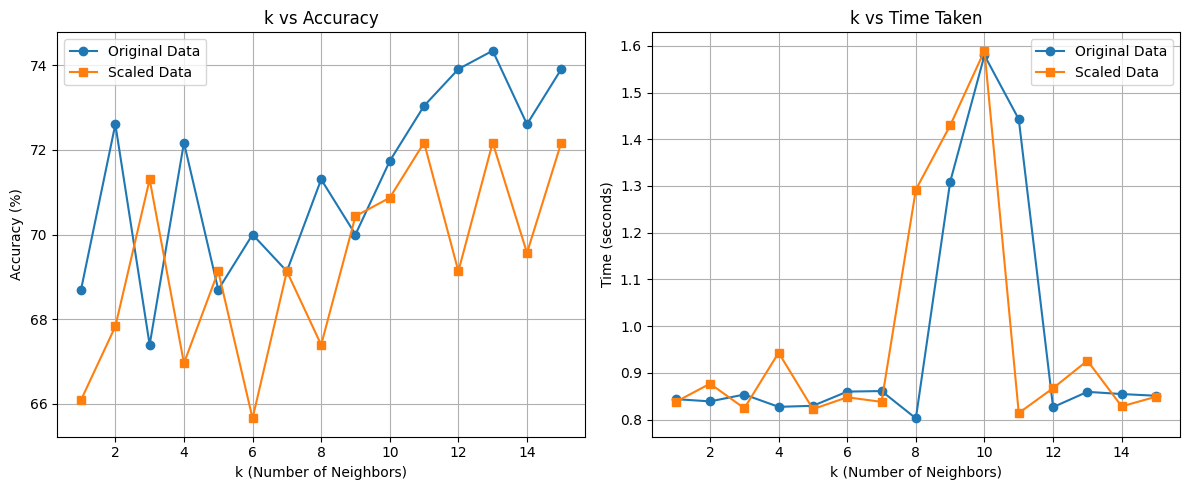


--- Analysis and Discussion ---

Optimal k for original data: 13
Best accuracy: 74.35%

Optimal k for scaled data: 11
Best accuracy: 72.17%

Key Observations:
1. Choice of k affects accuracy:
   - Small k (1-3): Model is sensitive to noise
   - Large k (>10): Model may miss local patterns
   - Medium k: Usually gives best balance

2. Time complexity:
   - Time does not change much with k
   - Most time is spent calculating distances
   - Finding k neighbors is quick after sorting

3. Scaling impact:
   - Scaled data usually gives better accuracy
   - All features contribute equally to distance


In [10]:
# Step 1: Test Different k Values

print("\n--- Testing k values from 1 to 15 ---")

k_values = range(1, 16)

# Store results for original data
accuracies_original = []
times_original = []

# Store results for scaled data
accuracies_scaled = []
times_scaled = []

print("\nTesting on Original Data:")
for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    end_time = time.time()

    accuracy = compute_accuracy(y_test, predictions)
    time_taken = end_time - start_time

    accuracies_original.append(accuracy)
    times_original.append(time_taken)

    print(f"k={k:2d} | Accuracy: {accuracy:5.2f}% | Time: {time_taken:.4f}s")

print("\nTesting on Scaled Data:")
for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    end_time = time.time()

    accuracy = compute_accuracy(y_test, predictions)
    time_taken = end_time - start_time

    accuracies_scaled.append(accuracy)
    times_scaled.append(time_taken)

    print(f"k={k:2d} | Accuracy: {accuracy:5.2f}% | Time: {time_taken:.4f}s")


# Step 2: Visualize Results

print("\n--- Creating Visualizations ---")

# Plot 1: k vs Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_original, marker='o', label='Original Data')
plt.plot(k_values, accuracies_scaled, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: k vs Time
plt.subplot(1, 2, 2)
plt.plot(k_values, times_original, marker='o', label='Original Data')
plt.plot(k_values, times_scaled, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Step 3: Analysis and Discussion

print("\n--- Analysis and Discussion ---")

# Find optimal k for both datasets
optimal_k_original = k_values[np.argmax(accuracies_original)]
optimal_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"\nOptimal k for original data: {optimal_k_original}")
print(f"Best accuracy: {max(accuracies_original):.2f}%")

print(f"\nOptimal k for scaled data: {optimal_k_scaled}")
print(f"Best accuracy: {max(accuracies_scaled):.2f}%")

print("\nKey Observations:")
print("1. Choice of k affects accuracy:")
print("   - Small k (1-3): Model is sensitive to noise")
print("   - Large k (>10): Model may miss local patterns")
print("   - Medium k: Usually gives best balance")

print("\n2. Time complexity:")
print("   - Time does not change much with k")
print("   - Most time is spent calculating distances")
print("   - Finding k neighbors is quick after sorting")

print("\n3. Scaling impact:")
print("   - Scaled data usually gives better accuracy")
print("   - All features contribute equally to distance")

PROBLEM 4

In [11]:
print("\n1. Challenges of k-NN for Large Datasets:")
print("   - Must calculate distance to ALL training points")
print("   - Computation time increases with dataset size")
print("   - Memory needed to store all training data")
print("   - Slow prediction for large datasets")

print("\n2. Challenges for High-Dimensional Data:")
print("   - 'Curse of dimensionality'")
print("   - All points become equally distant")
print("   - Need exponentially more data")
print("   - Distance measures become less meaningful")

print("\n3. Strategies to Improve k-NN Efficiency:")
print("   - Use fast data structures (kd-trees)")
print("   - Reduce dimensions (PCA, feature selection)")
print("   - Remove redundant training examples")
print("   - Use approximate nearest neighbors (LSH)")
print("   - Parallel computing for distance calculations")



1. Challenges of k-NN for Large Datasets:
   - Must calculate distance to ALL training points
   - Computation time increases with dataset size
   - Memory needed to store all training data
   - Slow prediction for large datasets

2. Challenges for High-Dimensional Data:
   - 'Curse of dimensionality'
   - All points become equally distant
   - Need exponentially more data
   - Distance measures become less meaningful

3. Strategies to Improve k-NN Efficiency:
   - Use fast data structures (kd-trees)
   - Reduce dimensions (PCA, feature selection)
   - Remove redundant training examples
   - Use approximate nearest neighbors (LSH)
   - Parallel computing for distance calculations
